**Data Importation**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Business questions**
1. What is the highest and most valuable segment?
2. Which countries generated the highest sales ?
3. What is the trend of our profits ?
4. Which category generated the most profit ?
5. Who is our most loyal customer ?


In [4]:
super_store = pd.read_csv("superstore.csv", encoding = 'latin')

In [5]:
pd.set_option('display.max_columns', None)

**Data Exploration**

In [6]:
super_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [7]:
super_store.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,94533.0,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,NaN,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,NaN,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,NaN,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,United States,80538.0,US,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


In [8]:
super_store.shape

(51290, 24)

In [9]:
super_store.ndim

2

In [10]:
super_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [11]:
super_store.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [12]:
round(super_store.describe(),3)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000,9994.000,51290.000,51290.000,51290.000,51290.000,51290.000
mean,25645.500,55190.379,246.491,3.477,0.143,28.611,26.376
std,14806.292,32063.693,487.565,2.279,0.212,174.341,57.297
min,1.000,1040.000,0.444,1.000,0.000,-6599.978,0.000
25%,12823.250,23223.000,30.759,2.000,0.000,0.000,2.610
50%,25645.500,56430.500,85.053,3.000,0.000,9.240,7.790
75%,38467.750,90008.000,251.053,5.000,0.200,36.810,24.450
max,51290.000,99301.000,22638.480,14.000,0.850,8399.976,933.570


In [13]:
super_store.describe(include="object")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,1430,1464,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4
top,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,135,130,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433


In [14]:
super_store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [15]:
for col in super_store.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City
State
Country
Postal Code
Market
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Shipping Cost
Order Priority


**Data Analysis**

In [86]:
segment_sales = super_store.groupby("Segment")["Sales"].sum()

In [87]:
segment_sales

Segment
Consumer       6.507949e+07
Corporate      3.824698e+07
Home Office    2.309855e+07
Name: Sales, dtype: float64

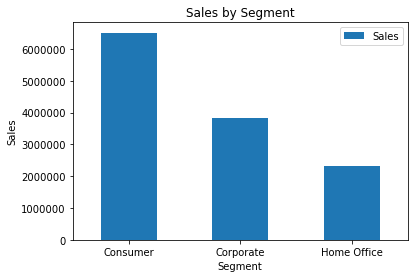

In [20]:
segment_sales = pd.DataFrame({'Segment': segment_sales.index, 'Sales': segment_sales.values})

# Plot a bar chart using the plot.bar() method of the DataFrame
segment_sales.plot.bar(x='Segment', y='Sales', rot=0)


# Set the axis labels and title
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.title("Sales by Segment")

ax = plt.gca()

# set the y-axis tick label format to plain
ax.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

In [22]:
country_profit = super_store.groupby("Country")["Profit"].sum()

In [23]:
country_profit

Country
Afghanistan     5460.30000
Albania          709.32000
Algeria         9106.50000
Angola          6494.97000
Argentina     -18693.79672
                  ...     
Venezuela     -11222.71044
Vietnam        -1870.23060
Yemen          -3706.45800
Zambia          7001.73000
Zimbabwe       -5428.78500
Name: Profit, Length: 147, dtype: float64

In [56]:
df = pd.DataFrame(super_store)

In [57]:
top_10_profitable_countries = df.groupby('Country')['Profit'].sum().nlargest(10)

In [58]:
top_10_profitable_countries

Country
United States     286397.02170
China             150683.08500
India             129071.83500
United Kingdom    111900.15000
France            109029.00300
Germany           107322.82050
Australia         103907.43300
Mexico            102818.09752
Spain              54390.12000
El Salvador        42023.24320
Name: Profit, dtype: float64

In [1]:
top_10_profitable_countries = pd.DataFrame({'Country': top_10_profitable_countries.index, 'Profit': top_10_profitable_countries})

# Plot a bar chart using the plot.bar() method of the DataFrame
top_10_profitable_countries.plot.bar(x='Country', y='Profit', rot=90)


# Set the axis labels and title
plt.xlabel("Country")
plt.ylabel("Profit")
plt.title("Country by Profit")
plt.grid(True)

ax = plt.gca()

# set the y-axis tick label format to plain
ax.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

NameError: name 'pd' is not defined

In [ ]:
country_profit_sorted = country_sales.sort_values(ascending=False)

In [ ]:
country_profit_sorted

In [ ]:
country_segment_profit = super_store.groupby(["Country", "Segment"])["Profit"].sum()


In [42]:
country_segment_profit

Country      Segment    
Afghanistan  Consumer        791.850
             Corporate      3612.270
             Home Office    1056.180
Albania      Consumer        330.420
             Corporate       356.820
                              ...   
Zambia       Corporate      1197.840
             Home Office    2172.240
Zimbabwe     Consumer      -1659.354
             Corporate     -1850.379
             Home Office   -1919.052
Name: Profit, Length: 408, dtype: float64

In [43]:
profitable_countries_segment = df.groupby(['Country','Segment'])['Profit'].sum().nlargest(10)

In [44]:
profitable_countries_segment

Country         Segment    
United States   Consumer       134119.20920
                Corporate       91979.13400
China           Consumer        76396.77900
Germany         Consumer        67034.49300
India           Consumer        66816.19500
United States   Home Office     60298.67850
Australia       Consumer        57037.16700
Mexico          Consumer        54960.56352
United Kingdom  Consumer        54855.01500
France          Consumer        50318.36850
Name: Profit, dtype: float64

In [45]:
segment_profit = super_store.groupby("Segment")["Profit"].mean()

In [46]:
segment_profit

Segment
Consumer       28.254008
Corporate      28.596042
Home Office    29.648847
Name: Profit, dtype: float64

In [47]:
x = super_store.Year
y = super_store.Profit
z = super_store.Discount

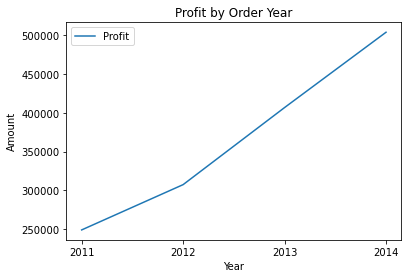

In [48]:
df_yearly = df.groupby(df['Year'])[['Profit']].sum()

# Plot line chart
plt.plot(df_yearly.index, df_yearly['Profit'], label='Profit')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Profit by Order Year')

# Add legend
plt.legend()

# Show plot
plt.show()

In [53]:
df = pd.DataFrame(super_store)

In [50]:
for i in range(len(df)):
    date_string = df.loc[i, 'Order Date']
    year = date_string[-4:]  
    df.loc[i, 'Year'] = year

In [81]:
category_profit = super_store.groupby("Category")["Profit"].sum()

In [82]:
category_profit

Category
Furniture          285204.72380
Office Supplies    518473.83430
Technology         663778.73318
Name: Profit, dtype: float64

In [83]:
df = pd.DataFrame(super_store)

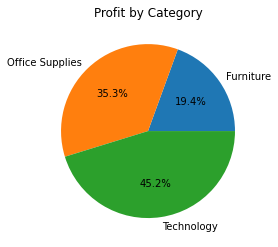

In [85]:
category_profit = pd.DataFrame({'Category': category_profit.index, 'Profit': category_profit.values})

plt.pie(category_profit['Profit'], labels=category_profit['Category'], autopct='%1.1f%%')

# Add a title
plt.title('Profit by Category')

# Show the plot
plt.show()

In [16]:
df = pd.DataFrame(super_store)

In [20]:
# Filter the dataframe for each category and group by product name to get the top 5 sales
top_tech_sales = df[df['Category'] == 'Technology'].groupby('Product Name')['Sales'].sum().nlargest(5)
top_furniture_sales = df[df['Category'] == 'Furniture'].groupby('Product Name')['Sales'].sum().nlargest(5)
top_office_sales = df[df['Category'] == 'Office Supplies'].groupby('Product Name')['Sales'].sum().nlargest(5)

In [21]:
top_tech_sales

Product Name
Apple Smart Phone, Full Size             86935.7786
Cisco Smart Phone, Full Size             76441.5306
Motorola Smart Phone, Full Size          73156.3030
Nokia Smart Phone, Full Size             71904.5555
Canon imageCLASS 2200 Advanced Copier    61599.8240
Name: Sales, dtype: float64

In [22]:
top_furniture_sales

Product Name
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
SAFCO Executive Leather Armchair, Black                     41923.5300
Novimex Executive Leather Armchair, Adjustable              40585.1336
Name: Sales, dtype: float64

In [23]:
top_office_sales

Product Name
Eldon File Cart, Single Width     34387.7287
Hoover Stove, White               32842.6043
Hoover Stove, Red                 31663.7790
Rogers File Cart, Single Width    29466.3053
Smead Lockers, Industrial         28991.6640
Name: Sales, dtype: float64

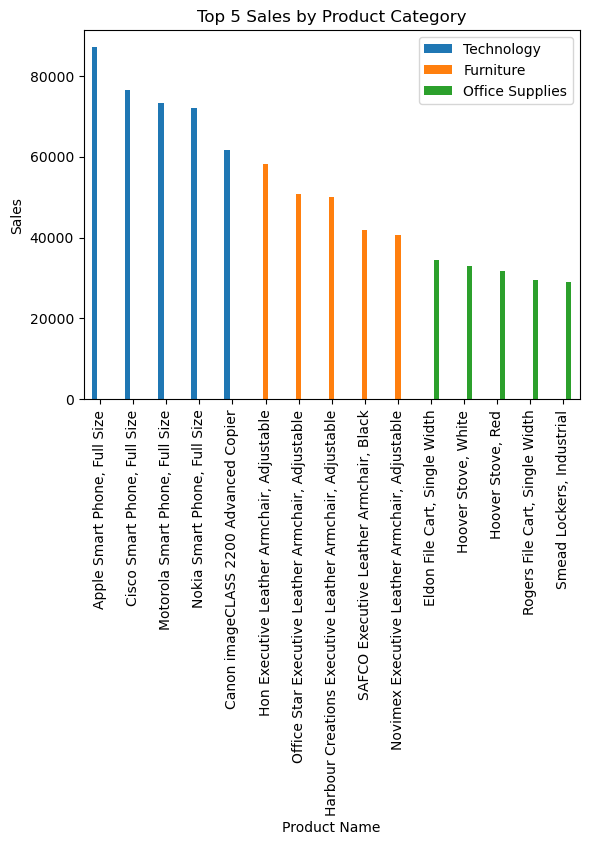

In [30]:
# Combine the top sales from each category into a single dataframe
top_sales_df = pd.concat([top_tech_sales, top_furniture_sales, top_office_sales], axis=1, sort=False)
top_sales_df.columns = ['Technology', 'Furniture', 'Office Supplies']

# Create the clustered bar chart
top_sales_df.plot(kind='bar')
plt.title('Top 5 Sales by Product Category')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.show()

In [51]:
super_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


From the analysis it can be observed that USA is the most profitable country followed by China and India. Also from the line chart we can also infer that the profit continued to increase as the years went by, meaning, the order request increased on average for all the product along the years. 

In [ ]:
LOYALTY PROGRAMME
Company plans a loyalty program for its top customers, it is therefore necessary to know people who prioritise our products. 

In [38]:
df = pd.DataFrame(super_store)

In [104]:
top_10_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(10) 

In [105]:
top_10_customers

Customer Name
Tom Ashbrook          40488.07080
Tamara Chand          37457.33300
Greg Tran             35550.95428
Christopher Conant    35187.07640
Sean Miller           35170.93296
Bart Watters          32310.44650
Natalie Fritzler      31781.25850
Fred Hopkins          30400.67452
Jane Waco             30288.45030
Hunter Lopez          30243.56658
Name: Sales, dtype: float64

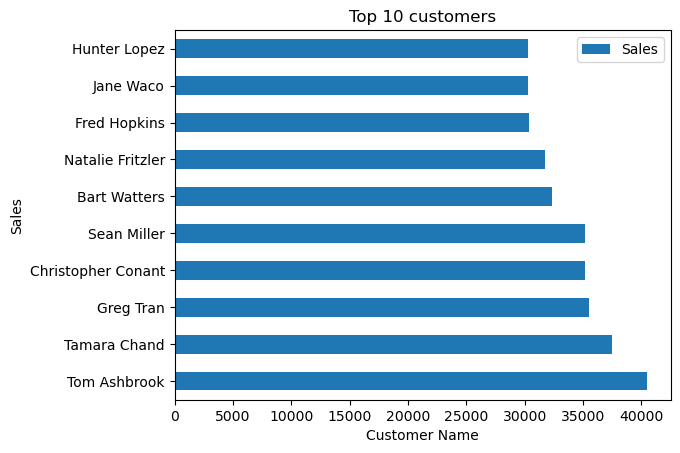

In [106]:
top_10_customers = pd.DataFrame({'Customer Name': top_10_customers.index, 'Sales': top_10_customers})

# Plot a bar chart using the plot.bar() method of the DataFrame
top_10_customers.plot.barh(x='Customer Name', y='Sales')


# Set the axis labels and title
plt.xlabel("Customer Name")
plt.ylabel("Sales")
plt.title("Top 10 customers")





# Show the plot
plt.show()





**RECCOMMENDATIONS** 

In [ ]:
1. There should be a focus on stocking consumer electronics(technology)
2. The United States market should be a priority
3. Our profits trend peaked in 2014, business structures must be maintained to ensure a steady growth 
3. For the loyalty program the top ten customers should be awarded.